<a href="https://colab.research.google.com/github/yiwenwangANU/Machine_Learning/blob/main/02_Neural_Network_Classification_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import the make_moons() data from sklearn

In [63]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


In [64]:
# import Scikit-Learn's make_moons() dataset
from sklearn.datasets import make_moons

X, y = make_moons(1000, noise=0.3, random_state=0)

##Visualize the data

In [65]:
# Visusalize data
X[:10], X.shape, X.min(), X.max()

(array([[ 2.12957268,  0.62990385],
        [ 1.8888818 ,  0.1462573 ],
        [-0.19035705,  0.38399281],
        [-0.40441619,  0.19528201],
        [ 0.37301216, -0.42971569],
        [ 1.89472086,  0.53718214],
        [ 0.8116396 ,  0.67614677],
        [-0.0117708 ,  0.93414674],
        [-0.90867526,  0.54521076],
        [ 0.59737656, -0.76238004]]),
 (1000, 2),
 -1.597795697557392,
 2.7069828754733494)

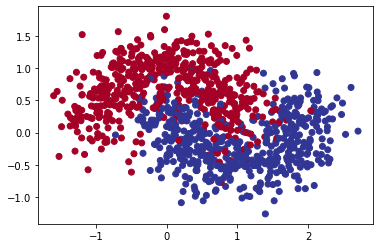

In [66]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [67]:
y[:10], y.shape, y.min(), y.max()

(array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1]), (1000,), 0, 1)

##Split the training set and test set

In [68]:
# Train, Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Normalize features using `MinMaxScaler`

In [69]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [70]:
X_train_norm[:10], X_train_norm.shape, X_train_norm.min(), X_train_norm.max()

(array([[0.52861052, 0.53452049],
        [0.46788761, 0.24141914],
        [0.41262405, 0.70079463],
        [0.31304368, 0.46904938],
        [0.83732898, 0.53476808],
        [0.22408105, 0.66149955],
        [0.27040798, 0.69606724],
        [0.66381086, 0.57923663],
        [0.62300843, 0.45686325],
        [0.44437887, 0.3279644 ]]), (800, 2), 0.0, 1.0)

##Build the model

In [83]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train_norm,
                    y_train,
                    epochs=40,
                    validation_data=(X_test_norm, y_test))

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 17ms/step - loss: 0.6390 - accuracy: 0.6612 - val_loss: 0.6228 - val_accuracy: 0.6100
Epoch 2/40
25/25 [==============================] - 0s 7ms/step - loss: 0.5071 - accuracy: 0.7962 - val_loss: 0.5252 - val_accuracy: 0.7600
Epoch 3/40
25/25 [==============================] - 0s 6ms/step - loss: 0.3892 - accuracy: 0.8562 - val_loss: 0.4737 - val_accuracy: 0.7550
Epoch 4/40
25/25 [==============================] - 0s 6ms/step - loss: 0.3271 - accuracy: 0.8612 - val_loss: 0.4699 - val_accuracy: 0.7550
Epoch 5/40
25/25 [==============================] - 0s 8ms/step - loss: 0.3140 - accuracy: 0.8650 - val_loss: 0.4653 - val_accuracy: 0.7750
Epoch 6/40
25/25 [==============================] - 0s 6ms/step - loss: 0.3209 - accuracy: 0.8637 - val_loss: 0.4726 - val_accuracy: 0.7750
Epoch 7/40
25/25 [==============================] - 0s 7ms/step - loss: 0.3059 - accuracy: 0.8587 - val_loss: 0.4597 - val_accuracy: 0.7750
Epoch 8/40
25/25 [============

##Evaluate the model

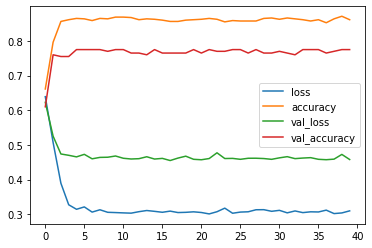

In [84]:
# Check out the history
pd.DataFrame(history.history).plot()

In [73]:
# Check out the confusion matrix
y_prob = model.predict(X_test_norm)
y_pred = tf.math.round(y_prob)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[70, 24],
       [22, 84]])

In [85]:
# Figure out the ideal value for the learning rate
tf.random.set_seed(42)

# Create the model_v2
model_v2 = tf.keras.Sequential()
model_v2.add(tf.keras.layers.Dense(10, activation="relu"))
model_v2.add(tf.keras.layers.Dense(10, activation="relu"))
model_v2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model_v2
model_v2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["accuracy"])

# Create learing rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model_v2
history_v2 = model_v2.fit(X_train_norm,
                    y_train,
                    epochs=40,
                    callbacks=[lr_scheduler],
                    validation_data=(X_test_norm, y_test),
                    verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


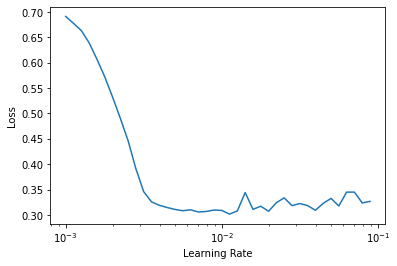

In [86]:
# Plot learning rate versus loss
lrs = 1e-3 * 10**(np.arange(40)/20)
plt.semilogx(lrs, history_v2.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.show()

In [88]:
# Choose learning rate as 0.003 
# Set random seed
tf.random.set_seed(42)

# Create the model_v3
model_v3 = tf.keras.Sequential()
model_v3.add(tf.keras.layers.Dense(10, activation="relu"))
model_v3.add(tf.keras.layers.Dense(10, activation="relu"))
model_v3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Compile the model_v3
model_v3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.003),
              metrics=["accuracy"])

# Fit the model_v3
history_v3 = model_v3.fit(X_train_norm,
                    y_train,
                    epochs=40,
                    validation_data=(X_test_norm, y_test))

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 16ms/step - loss: 0.6803 - accuracy: 0.5100 - val_loss: 0.6756 - val_accuracy: 0.4750
Epoch 2/40
25/25 [==============================] - 0s 8ms/step - loss: 0.6433 - accuracy: 0.5700 - val_loss: 0.6426 - val_accuracy: 0.5750
Epoch 3/40
25/25 [==============================] - 0s 8ms/step - loss: 0.5855 - accuracy: 0.7375 - val_loss: 0.6062 - val_accuracy: 0.6850
Epoch 4/40
25/25 [==============================] - 0s 6ms/step - loss: 0.5311 - accuracy: 0.7912 - val_loss: 0.5667 - val_accuracy: 0.7500
Epoch 5/40
25/25 [==============================] - 0s 7ms/step - loss: 0.4777 - accuracy: 0.8512 - val_loss: 0.5347 - val_accuracy: 0.7600
Epoch 6/40
25/25 [==============================] - 0s 9ms/step - loss: 0.4299 - accuracy: 0.8512 - val_loss: 0.5020 - val_accuracy: 0.7600
Epoch 7/40
25/25 [==============================] - 0s 7ms/step - loss: 0.3789 - accuracy: 0.8587 - val_loss: 0.4729 - val_accuracy: 0.7550
Epoch 8/40
25/25 [============

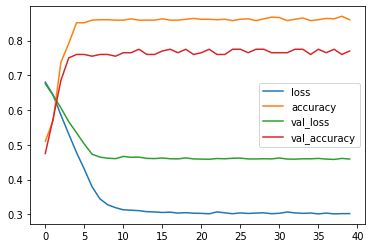

In [89]:
# Check out the history
pd.DataFrame(history_v3.history).plot()

In [90]:
# Check out the confusion matrix
y_prob = model_v3.predict(X_test_norm)
y_pred = tf.math.round(y_prob)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[72, 22],
       [24, 82]])